In [2]:
import yfinance as yf
import pandas as pd

# Step 1: Ticker symbols for selected stocks
tickers = ['RELIANCE.NS', 'INFY.NS', 'ICICIBANK.NS']

# Step 2: Download monthly data
data = yf.download(tickers,
                   start='2020-01-01',
                   end='2023-05-31',
                   interval='1mo')

# Print the columns of the downloaded data to inspect them
print("Columns available in the downloaded data:")
print(data.columns)

# Check if 'Adj Close' is in the columns. If not, try 'Close'.
if 'Adj Close' in data.columns.get_level_values(0):
    data = data['Adj Close']
elif 'Close' in data.columns.get_level_values(0):
    data = data['Close']
else:
    # Handle the case where neither 'Adj Close' nor 'Close' is available
    print("Neither 'Adj Close' nor 'Close' column found in the data.")
    # You might want to raise an error or handle this case differently
    # depending on your needs. For now, we will continue with the full data
    # and drop NaNs, but be aware that the desired price data might not be present.
    pass # Or raise Exception("Price column not found")


# Step 3: Drop any missing values
data = data.dropna()

# Step 4: Preview the data
print("\nData after selecting price column and dropping NaNs:")
print(data.head())

[*********************100%***********************]  3 of 3 completed

Columns available in the downloaded data:
MultiIndex([( 'Close', 'ICICIBANK.NS'),
            ( 'Close',      'INFY.NS'),
            ( 'Close',  'RELIANCE.NS'),
            (  'High', 'ICICIBANK.NS'),
            (  'High',      'INFY.NS'),
            (  'High',  'RELIANCE.NS'),
            (   'Low', 'ICICIBANK.NS'),
            (   'Low',      'INFY.NS'),
            (   'Low',  'RELIANCE.NS'),
            (  'Open', 'ICICIBANK.NS'),
            (  'Open',      'INFY.NS'),
            (  'Open',  'RELIANCE.NS'),
            ('Volume', 'ICICIBANK.NS'),
            ('Volume',      'INFY.NS'),
            ('Volume',  'RELIANCE.NS')],
           names=['Price', 'Ticker'])

Data after selecting price column and dropping NaNs:
Ticker      ICICIBANK.NS     INFY.NS  RELIANCE.NS
Date                                             
2020-01-01    508.124207  680.825439   645.358887
2020-02-01    480.670990  642.000122   607.414062
2020-03-01    312.955750  562.857788   509.169037
2020-04-01    3

In [3]:
# Step 1: Compute monthly returns
returns = data.pct_change().dropna()
# .dropna() removes the first row as it don't have any previous value.

# Step 2: Compute expected monthly return for each stock
expected_returns = returns.mean()

# Step 3: Compute standard deviation (volatility/ risk/uncertainity) for each stock
# high volatility means more risky.
volatility = returns.std()

# Step 4: Compute covariance matrix (used for portfolio variance)
cov_matrix = returns.cov()
# covariance tells how the two stocks move together...
# if the covariance is positive then they move in the same direction.

# Step 5: Display the summary table
summary = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

print("Summary Metrics:")
print(summary)
print("\nCovariance Matrix:")
print(cov_matrix) # also prints the covariance matrix.


Summary Metrics:
              Expected Return  Volatility
Ticker                                   
ICICIBANK.NS         0.020418    0.100425
INFY.NS              0.018649    0.088355
RELIANCE.NS          0.018115    0.091063

Covariance Matrix:
Ticker        ICICIBANK.NS   INFY.NS  RELIANCE.NS
Ticker                                           
ICICIBANK.NS      0.010085  0.002048     0.003442
INFY.NS           0.002048  0.007807     0.003719
RELIANCE.NS       0.003442  0.003719     0.008292


In [4]:
portfolios = [
    [0.33, 0.33, 0.34],  # Equal weight
    [0.5, 0.3, 0.2],     # High weight to Reliance
    [0.2, 0.5, 0.3],     # High weight to Infosys
    [0.1, 0.2, 0.7],     # High weight to ICICI
    [0.4, 0.4, 0.2],     # Balanced but tilted
]
# each list is a portfolio.

In [5]:
import numpy as np

# Risk-free rate (monthly)
rf = 0.005 # used to compute the sharpe ratio.

# Store results
results = []

# Loop through each portfolio
for w in portfolios:
    weights = np.array(w)

    # Expected return
    port_return = np.dot(weights, expected_returns)

    # Portfolio variance
    port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

    # Portfolio standard deviation
    port_std = np.sqrt(port_variance)

    # Sharpe Ratio(risk adjusted return)
    sharpe_ratio = (port_return - rf) / port_std

    # Store
    results.append({
        'Weights': weights,
        'Return': port_return,
        'Std Dev': port_std,
        'Sharpe Ratio': sharpe_ratio
    })
    #Each portfolio’s metrics are saved in a dictionary and appended to the results list.

# Convert to DataFrame
port_df = pd.DataFrame(results)
print(port_df)


              Weights    Return   Std Dev  Sharpe Ratio
0  [0.33, 0.33, 0.34]  0.019051  0.070427      0.199510
1     [0.5, 0.3, 0.2]  0.019426  0.072833      0.198073
2     [0.2, 0.5, 0.3]  0.018842  0.070990      0.194987
3     [0.1, 0.2, 0.7]  0.018452  0.077983      0.172496
4     [0.4, 0.4, 0.2]  0.019249  0.070679      0.201607


In [6]:
import matplotlib.pyplot as plt

# Generate many random portfolios using these three stocks
num_portfolios = 10000
all_weights = [] # portfolio weights for the 3 stocks
port_returns = [] # expected return of each portfolio.
port_risks = [] # standard deviation (risk) of each portfolio
sharpe_ratios = [] # sharpe ratio of each portfolio.

for _ in range(num_portfolios):
    # Random weights that sum to 1
    weights = np.random.random(3)
    weights /= np.sum(weights)

    # Portfolio return
    ret = np.dot(weights, expected_returns)
    #This calculates the expected return of the portfolio

    # Portfolio standard deviation
    var = np.dot(weights.T, np.dot(cov_matrix, weights))
    std = np.sqrt(var)

    # Sharpe Ratio
    sharpe = (ret - rf) / std

    all_weights.append(weights)
    port_returns.append(ret)
    port_risks.append(std)
    sharpe_ratios.append(sharpe)

# Convert to arrays
port_returns = np.array(port_returns)
port_risks = np.array(port_risks)
sharpe_ratios = np.array(sharpe_ratios)
all_weights = np.array(all_weights)
# Converts your lists into NumPy arrays

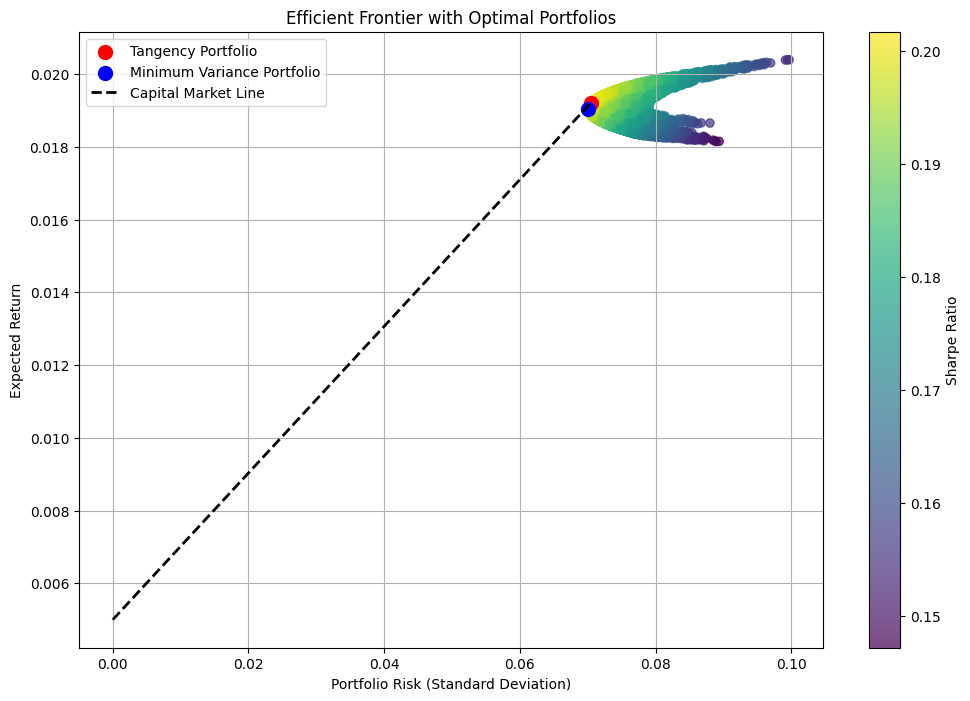

In [7]:
# Identify max Sharpe Ratio (Tangency Portfolio)
max_sharpe_idx = sharpe_ratios.argmax() # gives the index of the highest Sharpe ratio
tangent_ret = port_returns[max_sharpe_idx] # stores return of this
tangent_risk = port_risks[max_sharpe_idx] # stores standard deviation

# Identify Minimum Variance Portfolio (lowest standard deviation)
min_var_idx = port_risks.argmin() # gives the index of the lowest risk
min_var_ret = port_returns[min_var_idx]
min_var_risk = port_risks[min_var_idx]

# Plot: Creates the scatter plot of all 10,000 portfolios
plt.figure(figsize=(12, 8))
plt.scatter(port_risks, port_returns, c=sharpe_ratios, cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Optimal Portfolios')

# Plot Tangency Portfolio
plt.scatter(tangent_risk, tangent_ret, c='red', s=100, label='Tangency Portfolio')
#Plots the best risk-adjusted portfolio in red with a large marke

# Plot Minimum Variance Portfolio
plt.scatter(min_var_risk, min_var_ret, c='blue', s=100, label='Minimum Variance Portfolio')

# Capital Market Line
cml_x = [0, tangent_risk]
cml_y = [rf, tangent_ret]
plt.plot(cml_x, cml_y, color='black', linestyle='--', linewidth=2, label='Capital Market Line')
#CML is the line from the risk-free rate to the Tangency Portfolio

plt.legend()
plt.grid(True)
plt.show()
